______________________________

# ***CREDIT CARD FRAUD DETECTION*** 

__________________________________________________________

# ***1.Business Understanding***: 

**Context**
- Mastercard credit card company faces increasing credit card fraud, leading to financial loss and customer distrust.

**Stakeholder**
- The Fraud Detection Department, led by the Chief Risk Officer (CRO), aims to enhance fraud detection accuracy to protect customer assets and reduce operational costs associated with false fraud alerts.

**Business Problem**
- The current rule-based fraud detection system suffers from high false positives, causing customer dissatisfaction, and misses sophisticated fraudulent transactions (high false negatives).

**Objective**
- Implement a machine learning model to better identify fraudulent transactions using historical data, decreasing false positives and negatives, and adapting to evolving fraud patterns.

**Dataset**
- An imbalanced dataset with 284,807 credit card transactions from September 2013, including 492 frauds. Features are primarily numerical and result from PCA, except for 'Time' and 'Amount'.

**Expected Outcome**
- Improve customer experience by reducing erroneous fraud alerts, increase detection of actual fraud, and maintain the company's reputation as a secure card issuer.

**Next Steps**
- Develop, fine-tune, and deploy a machine learning model in collaboration with the Data Science team, ensuring ongoing effectiveness through regular updates.

____________________________

# ***2.Data Understanding***

## ***2.1.Descriptive Analysis***

In [1]:
import pandas as pd
import numpy as np

class CreditCardData:
    def __init__(self, file_path):
        self.file_path = file_path
        self.data = None

    def load_data(self):
        self.data = pd.read_csv(self.file_path)

    def display_first_few_rows(self, n_rows=5):
        if self.data is None:
            self.load_data()
        return self.data.head(n_rows)

class CreditCardDataExplorer:
    def __init__(self, credit_card_data):
        self.credit_card_data = credit_card_data

    def generate_summary(self):
        first_few_rows = self.credit_card_data.display_first_few_rows()  # Display first few rows
        print("First few rows of the dataset:")
        print(first_few_rows)

        if self.credit_card_data.data is None:
            self.credit_card_data.load_data()

        dataset = self.credit_card_data.data  # Accessing the Pandas DataFrame from CreditCardData

        summary = {
            "Dataset Shape": dataset.shape,
            "Missing Values": dataset.isnull().sum().sum(),
            "Class Distribution": dataset['Class'].value_counts(),
            "Time Feature Description": dataset['Time'].describe(),
            "Amount Feature Description": dataset['Amount'].describe()
        }
        return summary

# Creating an instance of the CreditCardData class
file_path = 'creditcard.csv'  
credit_card_data = CreditCardData(file_path)

# Instantiate the class and generate the exploration summary with displaying the first few rows
explorer = CreditCardDataExplorer(credit_card_data)
exploration_summary = explorer.generate_summary()
print("\nExploration Summary:")
print(exploration_summary)




First few rows of the dataset:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

 

### ***The Descriptive analysis reveals several key points about the dataset***:

***Dataset Shape***:
- The dataset contains 284,807 transactions, each with 31 features.

***Missing Values***:
- There are no missing values in the dataset, which simplifies the preprocessing stage.

***Class Distribution***:
- Non-fraudulent transactions (Class = 0): 284,315
- Fraudulent transactions (Class = 1): 492

This confirms the significant class imbalance mentioned earlier, with only about 0.172% of transactions being fraudulent.

***Time Feature***:
- The Time feature ranges from 0 to 172,792 seconds, suggesting a time span of about two days.
- The mean and median (50% percentile) values indicate a relatively uniform distribution of transactions over this period.

***Amount Feature***:
- Transaction amounts vary widely, ranging from 0 to 25,691.16 units.
- The mean transaction amount is about 88.35 units, but the standard deviation is quite high (250.12 units), indicating a large variability in transaction amounts.

Given the class imbalance, our next steps will include further data analysis, particularly focusing on how the 'Time' and 'Amount' features relate to fraud occurrences. 

-----------

# ***2.2Exploratory Data Analysis***

## ***Time and amount features and their relationship with occurrence of fraud***

- ***Distribution of 'Time' and 'Amount' for both fraudulent and non-fraudulent transactions***: This will help us understand if there are specific patterns in time or transaction amount that are more associated with fraud.

- ***Correlation Analysis***: I'll be checking if there's any significant correlation between the 'Time' and 'Amount' features and the 'Class' variable. This will give us insights into how these features might influence the likelihood of a transaction being fraudulent.

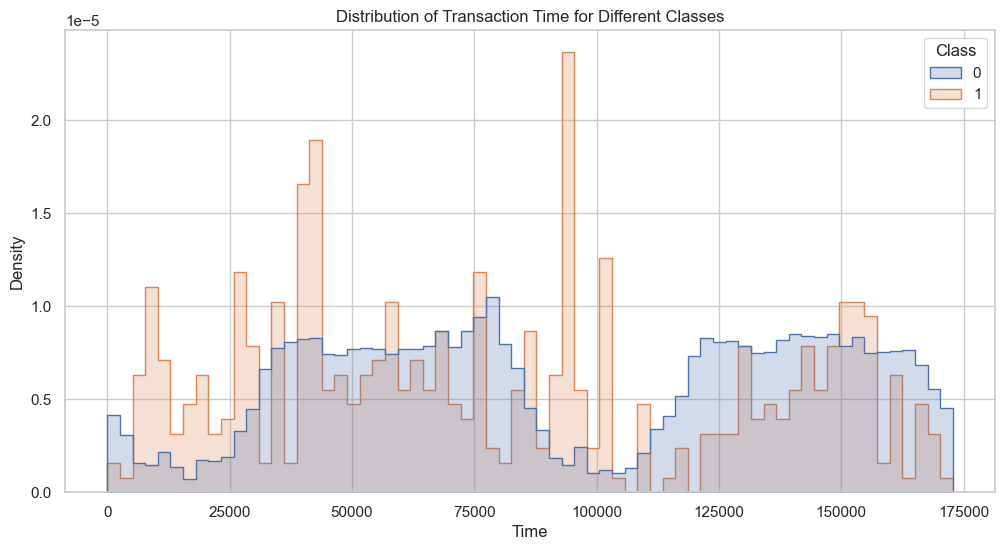

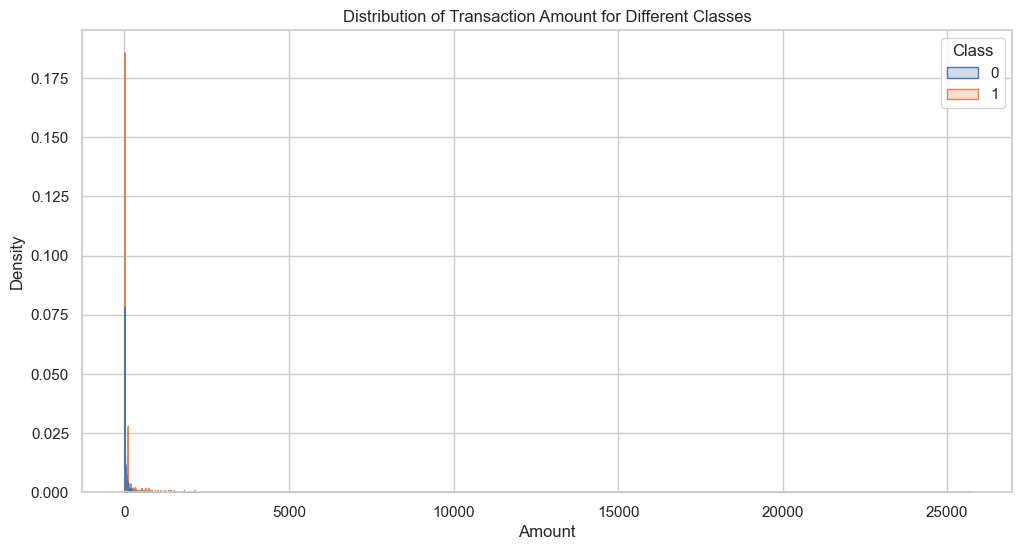

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

class DataVisualization:
    def __init__(self, credit_card_data):
        self.credit_card_data = credit_card_data
        sns.set(style="whitegrid")

    def plot_feature_distribution(self, feature, title):
        data = self.credit_card_data.data
        plt.figure(figsize=(12, 6))
        sns.histplot(data=data, x=feature, hue="Class", element="step", stat="density", common_norm=False)
        plt.title(title)
        plt.show()

# Creating an instance of the DataVisualization class
data_visualizer = DataVisualization(credit_card_data)

# Plotting distribution of 'Time' feature for both classes
data_visualizer.plot_feature_distribution("Time", "Distribution of Transaction Time for Different Classes")

# Plotting distribution of 'Amount' feature for both classes
data_visualizer.plot_feature_distribution("Amount", "Distribution of Transaction Amount for Different Classes")


### **The distribution plots for the 'Time' and 'Amount' features provided some interesting insights**:

***Transaction Time Distribution***:

- The distribution of transactions (both fraudulent and non-fraudulent) over time shows cyclic patterns, likely reflecting daily activity cycles.
- There doesn't appear to be a clear, distinct pattern in the timing of fraudulent transactions compared to non-fraudulent ones. However, there might be slight increases in fraudulent activity at certain times.

***Transaction Amount Distribution***:

- Most transactions, regardless of class, are of lower amounts, with the distribution heavily skewed towards smaller values.
- Fraudulent transactions also tend to be of lower amounts, note that the scale of fraudulent transactions is much smaller due to the class imbalance.

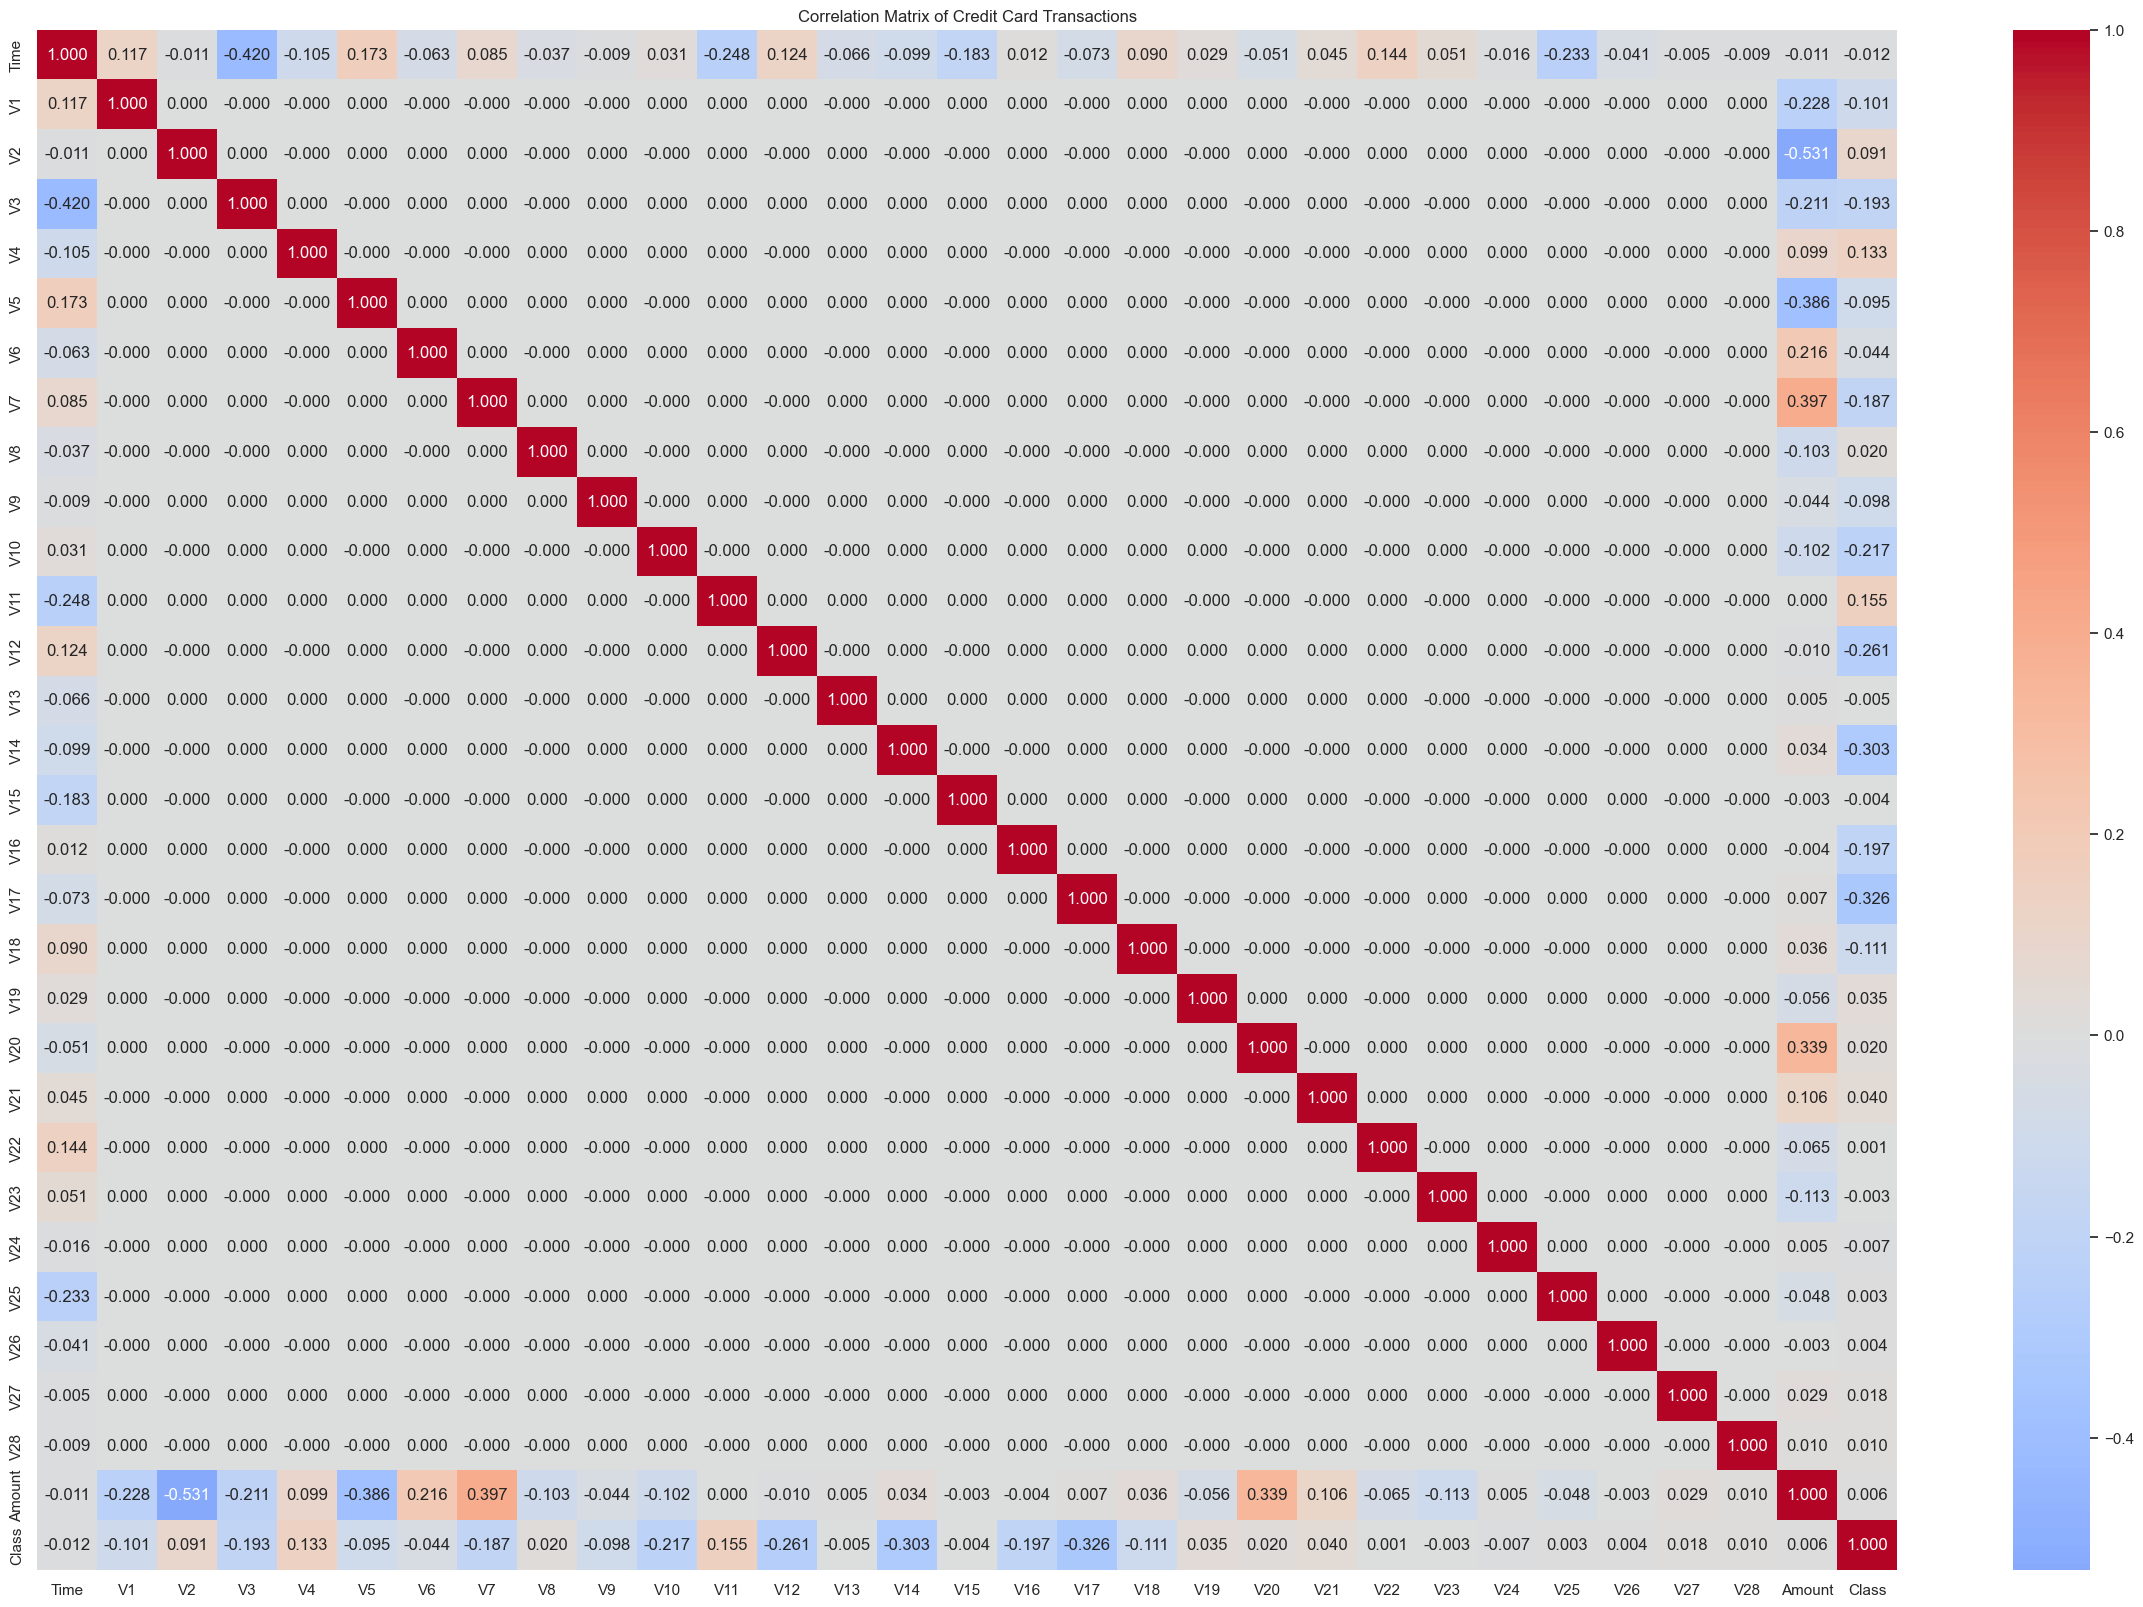

V17      -0.326481
V14      -0.302544
V12      -0.260593
V10      -0.216883
V16      -0.196539
V3       -0.192961
V7       -0.187257
V18      -0.111485
V1       -0.101347
V9       -0.097733
V5       -0.094974
V6       -0.043643
Time     -0.012323
V24      -0.007221
V13      -0.004570
V15      -0.004223
V23      -0.002685
V22       0.000805
V25       0.003308
V26       0.004455
Amount    0.005632
V28       0.009536
V27       0.017580
V8        0.019875
V20       0.020090
V19       0.034783
V21       0.040413
V2        0.091289
V4        0.133447
V11       0.154876
Class     1.000000
Name: Class, dtype: float64


In [3]:


class CorrelationAnalysis:
    def __init__(self, credit_card_data):
        self.credit_card_data = credit_card_data

    def plot_correlation_matrix(self):
        plt.figure(figsize=(30, 20))
        correlation_matrix = self.credit_card_data.data.corr()
        sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0)
        plt.title("Correlation Matrix of Credit Card Transactions")
        plt.show()

    def get_correlation_with_class(self):
        correlation_with_class = self.credit_card_data.data.corr()['Class'].sort_values()
        return correlation_with_class

# Assuming 'credit_card_data' is an instance of the CreditCardData class
# Creating an instance of the CorrelationAnalysis class
analysis = CorrelationAnalysis(credit_card_data)

# Plot the correlation matrix with adjusted annotations and decimal places
analysis.plot_correlation_matrix()

# Get correlation values with the 'Class' variable
correlation_values = analysis.get_correlation_with_class()

# Display correlation values
print(correlation_values)




### ***The correlation analysis reveals the following***:

***Correlation of 'Time' with 'Class'***:

- The correlation coefficient is approximately -0.0123, indicating a very weak inverse relationship between the time of the transaction and its likelihood of being fraudulent.

***Correlation of 'Amount' with 'Class'***:

- The correlation coefficient is about 0.0056, suggesting a very weak positive relationship between transaction amount and the likelihood of fraud.

***Correlation of PCA Components with 'Class'***:

- Some of the PCA-transformed features (like V17, V14, V12) have higher negative correlations with the 'Class' variable. This suggests they might be more significant in predicting fraud.
- Features like V11 and V4 show a moderately positive correlation with the 'Class' variable.

From these observations, it's clear that neither 'Time' nor 'Amount' has a strong linear relationship with fraud occurrence. However, considering the nonlinear and complex nature of such transactions, these features could still be valuable in a predictive model, especially when combined with the PCA-transformed features.

----------

# ***3.Data preparation and Model selection***

Given the severe class imbalance in this dataset, my primary goals in data preparation will be:

***Handling Class Imbalance*** :
- I will addres this using techniques like oversampling the minority class (i.e., using SMOTE)

***Data Splitting*** :
- Splitting the dataset into training and testing sets to ensure we can evaluate the model's performance on unseen data.

***For model selection, given the nature of the problem (binary classification with imbalanced data), I considered the following approaches*** :

***Random Forest***: Good for handling imbalanced data and does not require scaling of features.

***Gradient Boosting***: Often effective in classification problems.

***Logistic Regression***: A simpler model that can be effective if class weights are properly adjusted.

***Synthetic Minority Over-sampling Technique (SMOTE)***. 
- This technique will generate synthetic samples for the minority class, helping to balance the dataset without losing valuable information, which can be an issue with undersampling.

For model training, I'll use a pipeline approach that includes data preprocessing and fitting different ensemble models. I'll incorporate Random Forest, Gradient Boosting, and Logistic Regression . Using ensemble methods, especially Random Forest and Gradient Boosting, is beneficial as they tend to perform well with imbalanced datasets

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, confusion_matrix, precision_recall_curve, auc



# Access the DataFrame inside the CreditCardData instance
credit_card_data.load_data()  # Ensure the data is loaded if not already loaded

# Separating the features and the target variable
X = credit_card_data.data.drop('Class', axis=1)
y = credit_card_data.data['Class']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# StandardScaler for Logistic Regression
scaler = StandardScaler()

# SMOTE for handling class imbalance
smote = SMOTE(random_state=42)

# Creating models
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
lr_model = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42)

# Creating pipelines
rf_pipeline = make_pipeline(smote, rf_model)
gb_pipeline = make_pipeline(smote, gb_model)
lr_pipeline = make_pipeline(scaler, smote, lr_model)




_____
# ***4.Modeling and Evaluation***

# ***4.1.Logistic Regression  (Baseline Model***)

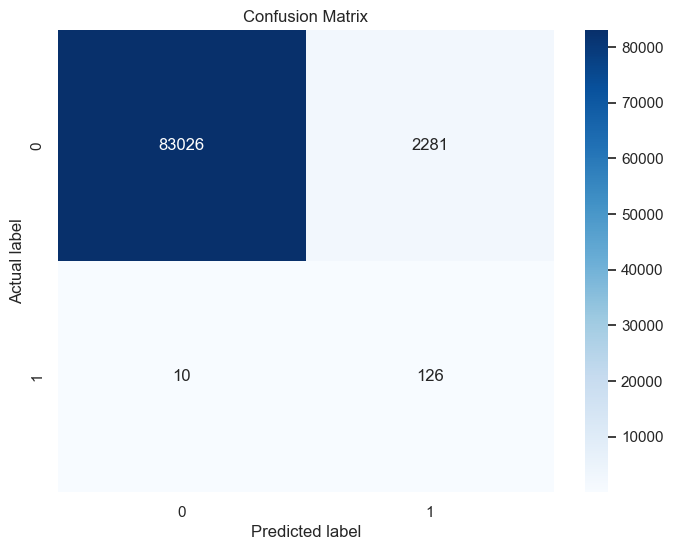

Accuracy: 0.9732, 
 Precision: 0.0523, Recall: 0.9265, 
 F1 Score: 0.0991, 
 ROC AUC: 0.9811, 
 AUPRC: 0.7955


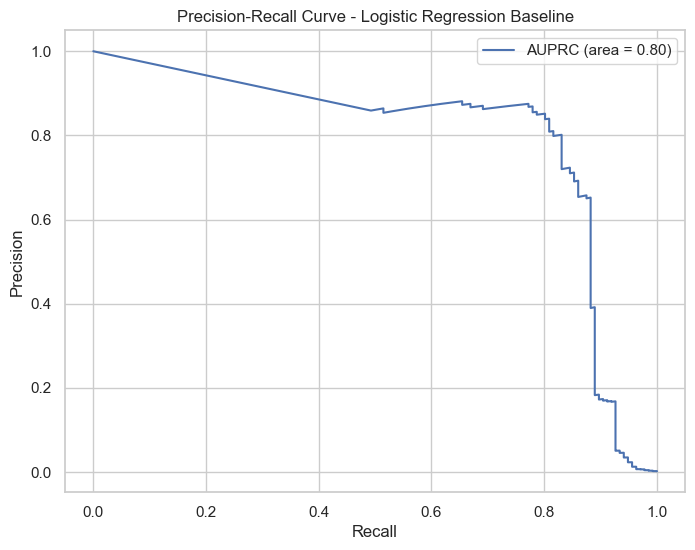

In [7]:
class LogisticRegressionBaseline:
    def __init__(self, X_train, y_train, X_test, y_test):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.model = lr_pipeline

    def train(self):
        self.model.fit(self.X_train, self.y_train)

    def evaluate_model(self):
        predictions = self.model.predict(self.X_test)
        probas_pred = self.model.predict_proba(self.X_test)[:, 1]

        accuracy = accuracy_score(self.y_test, predictions)
        precision = precision_score(self.y_test, predictions)
        recall = recall_score(self.y_test, predictions)
        f1 = f1_score(self.y_test, predictions)
        roc_auc = roc_auc_score(self.y_test, probas_pred)
        auprc = self.auc_score(self.y_test, probas_pred)

        # Confusion Matrix
        cm = confusion_matrix(self.y_test, predictions)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title('Confusion Matrix')
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')
        plt.show()

        print(f"Accuracy: {accuracy:.4f}, \n Precision: {precision:.4f}, Recall: {recall:.4f}, \n F1 Score: {f1:.4f}, \n ROC AUC: {roc_auc:.4f}, \n AUPRC: {auprc:.4f}")
        
    def plot_results(self):
        probas_pred = self.model.predict_proba(self.X_test)[:, 1]
        precision, recall, _ = precision_recall_curve(self.y_test, probas_pred)
        auc_score = auc(recall, precision)

        plt.figure(figsize=(8, 6))
        plt.plot(recall, precision, label=f'AUPRC (area = {auc_score:.2f})')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Curve - Logistic Regression Baseline')
        plt.legend(loc='best')
        plt.show()

    def auc_score(self, y_true, y_scores):
        precision, recall, _ = precision_recall_curve(y_true, y_scores)
        return auc(recall, precision)


lr_baseline = LogisticRegressionBaseline(X_train, y_train, X_test, y_test)
lr_baseline.train()
lr_baseline.evaluate_model()
lr_baseline.plot_results()



### ***Rationale***:

- Interpretability: The logistic regression model was initially chosen for its interpretability, providing insights into feature importance and relationships.
- Effectiveness in Binary Classification: Logistic regression serves as a fundamental model for binary classification tasks and often acts as a baseline for more complex models.

### ***Results***:

The Logistic Regression model produced the following metrics:

- **Accuracy**: 97.32% - High accuracy, but misleading due to class imbalance.
- **Precision**: 5.23% - Very low, indicating a high false positive rate.
- **Recall**: 92.65% - High, suggesting the model is good at detecting fraud.
- **F1 Score**: 9.91% - Low, due to the trade-off between precision and recall.
- **ROC AUC**: 98.11% - Indicates good separability between classes.
- **AUPRC**: 79.55% - More relevant for imbalanced datasets; indicates moderate performance.



- Imbalanced Dataset: The dataset's class imbalance affects the model's performance, particularly in terms of precision and accuracy.
- Performance Metrics: While the model exhibits high recall (good at detecting fraud) and a relatively high accuracy, its low precision suggests a high false positive rate.
- Primary Metric Selection: AUPRC, considering the imbalanced dataset, has been chosen as the primary metric due to its focus on the minority class's performance.

### ***Limitations***:

The model's low precision suggests that while it is capable of identifying most fraudulent transactions (high recall), it also misclassifies many non-fraudulent transactions as fraudulent. In a production environment, this could lead to a high number of false alarms, potentially leading to customer dissatisfaction and increased operational costs due to manual review.

Additionally, the model's performance may not generalize well to new, unseen data, especially if the underlying patterns of fraud change over time. The model is based on past data, and fraudsters continually change their tactics.

### ***Recommendations***:

Given the model's high recall but low precision, stakeholders should consider the trade-offs between detecting fraud and the cost of false positives. Improvements can be made by further tuning the model, possibly exploring more complex algorithms like Random Forest or Gradient Boosting

For immediate steps:

- Use the model as a first-level filter to identify potential fraud, followed by a secondary review process.
- Continue collecting data and updating the model to adapt to new patterns in fraudulent activity.
- Explore cost-sensitive learning or anomaly detection techniques that may be more suitable for imbalanced datasets.



-----
# ***4.2.Random Forest*** 

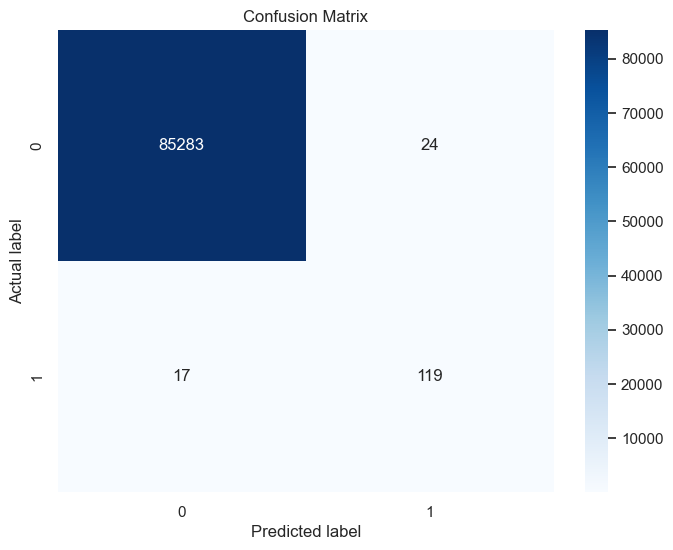

Accuracy: 0.9995, Precision: 0.8322, Recall: 0.8750, F1 Score: 0.8530, ROC AUC: 0.9768, AUPRC: 0.8835


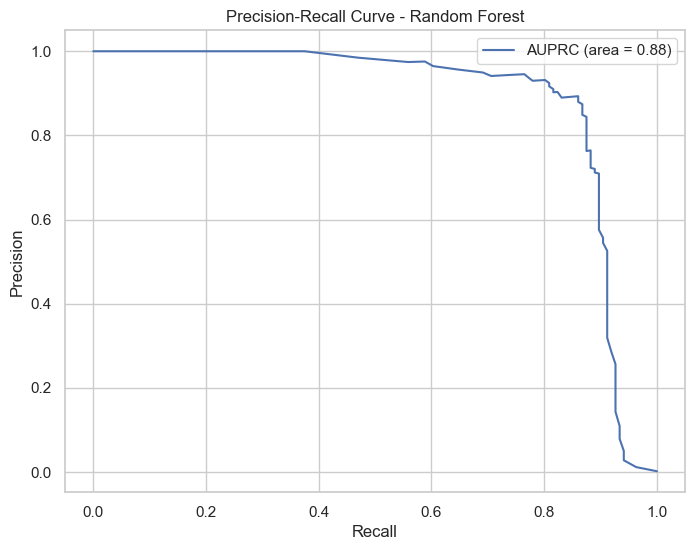

In [8]:
class RandomForestModel:
    def __init__(self, X_train, y_train, X_test, y_test):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.model = rf_pipeline

    def train(self):
        self.model =rf_pipeline
        self.model.fit(self.X_train, self.y_train)

    def evaluate_model(self):
        predictions = self.model.predict(self.X_test)
        probas_pred = self.model.predict_proba(self.X_test)[:, 1]

        accuracy = accuracy_score(self.y_test, predictions)
        precision = precision_score(self.y_test, predictions)
        recall = recall_score(self.y_test, predictions)
        f1 = f1_score(self.y_test, predictions)
        roc_auc = roc_auc_score(self.y_test, probas_pred)
        auprc = self.auc_score(self.y_test, probas_pred)

        # Confusion Matrix
        cm = confusion_matrix(self.y_test, predictions)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title('Confusion Matrix')
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')
        plt.show()

        print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, ROC AUC: {roc_auc:.4f}, AUPRC: {auprc:.4f}")
        
    def plot_results(self):
        probas_pred = self.model.predict_proba(self.X_test)[:, 1]
        precision, recall, _ = precision_recall_curve(self.y_test, probas_pred)
        auc_score = auc(recall, precision)

        plt.figure(figsize=(8, 6))
        plt.plot(recall, precision, label=f'AUPRC (area = {auc_score:.2f})')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Curve - Random Forest')
        plt.legend(loc='best')
        plt.show()

    def auc_score(self, y_true, y_scores):
        precision, recall, _ = precision_recall_curve(y_true, y_scores)
        return auc(recall, precision)  


rf_model = RandomForestModel(X_train, y_train, X_test, y_test)
rf_model.train()
rf_model.evaluate_model()
rf_model.plot_results()





### ***Rationale***:

The Random Forest algorithm was chosen for its robustness to overfitting, capacity to handle non-linear relationships, and its inherent feature selection capabilities. 

### ***Results***:

The classification metrics for the Random Forest model are:

- **Accuracy**: 99.95% - Suggests nearly all transactions are correctly classified.
- **Precision**: 83.22% - Indicates a relatively high likelihood that a transaction flagged as fraudulent is indeed fraudulent.
- **Recall**: 87.50% - Implies that a high percentage of actual frauds are detected.
- **F1 Score**: 85.30% - Reflects the balance between precision and recall.
- **ROC AUC**: 97.68% - Suggests a high true positive rate relative to the false positive rate.
- **AUPRC**: 88.35% - Given the class imbalance, this indicates the model has strong performance in distinguishing between the positive (fraudulent) and negative (non-fraudulent) classes.

### ***Limitations***:

The model's performance, while strong, may not generalize to unseen data, especially if the patterns of fraud evolve. The current performance may be overly optimistic if the model has inadvertently captured noise as a pattern due to the imbalance in the dataset. There may also be specific segments of transactions (e.g., of a certain amount or at certain times) where the model's performance could differ significantly.



______
# ***4.3.Gradient Boosting***

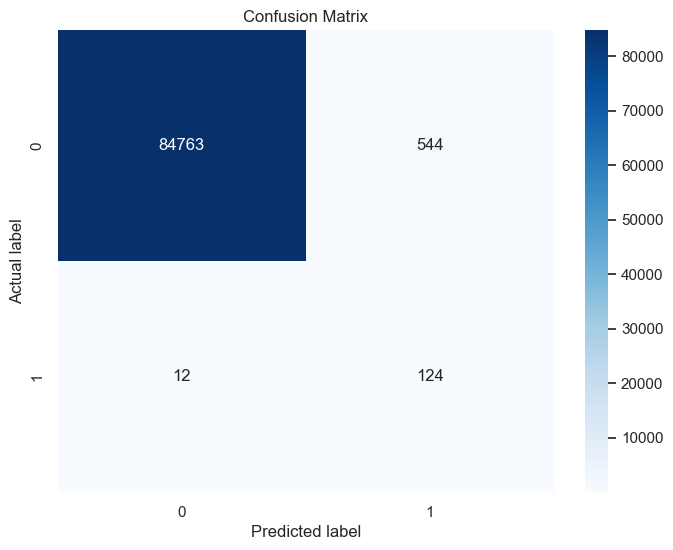

Accuracy: 0.9935, 
 Precision: 0.1856, Recall: 0.9118, 
 F1 Score: 0.3085, 
 ROC AUC: 0.9854, 
 AUPRC: 0.7814


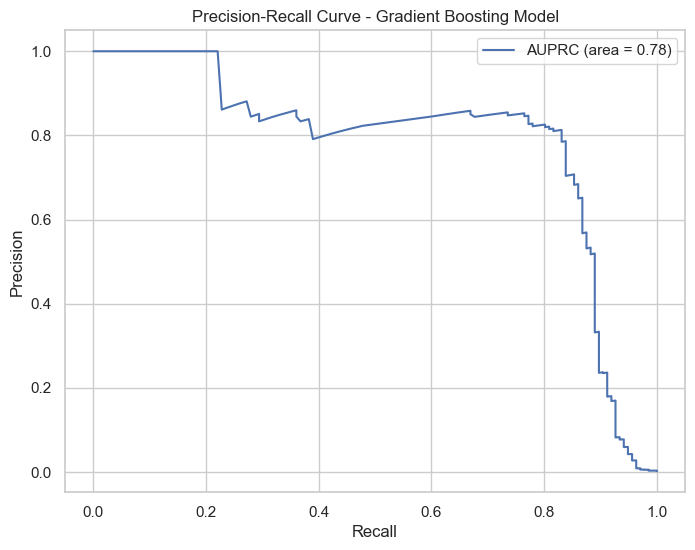

In [9]:
class GradientBoostingModel:
    def __init__(self, X_train, y_train, X_test, y_test):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.model = gb_pipeline

    def train(self):
        self.model.fit(self.X_train, self.y_train)

    def evaluate_model(self):
        predictions = self.model.predict(self.X_test)
        probas_pred = self.model.predict_proba(self.X_test)[:, 1]

        accuracy = accuracy_score(self.y_test, predictions)
        precision = precision_score(self.y_test, predictions)
        recall = recall_score(self.y_test, predictions)
        f1 = f1_score(self.y_test, predictions)
        roc_auc = roc_auc_score(self.y_test, probas_pred)
        auprc = self.auc_score(self.y_test, probas_pred)

        # Confusion Matrix
        cm = confusion_matrix(self.y_test, predictions)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title('Confusion Matrix')
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')
        plt.show()

        print(f"Accuracy: {accuracy:.4f}, \n Precision: {precision:.4f}, Recall: {recall:.4f}, \n F1 Score: {f1:.4f}, \n ROC AUC: {roc_auc:.4f}, \n AUPRC: {auprc:.4f}")
        
    def plot_results(self):
        probas_pred = self.model.predict_proba(self.X_test)[:, 1]
        precision, recall, _ = precision_recall_curve(self.y_test, probas_pred)
        auc_score = auc(recall, precision)

        plt.figure(figsize=(8, 6))
        plt.plot(recall, precision, label=f'AUPRC (area = {auc_score:.2f})')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Curve - Gradient Boosting Model')
        plt.legend(loc='best')
        plt.show()

    def auc_score(self, y_true, y_scores):
        precision, recall, _ = precision_recall_curve(y_true, y_scores)
        return auc(recall, precision) 


gb_model = GradientBoostingModel(X_train, y_train, X_test, y_test)
gb_model.train()
gb_model.evaluate_model()
gb_model.plot_results()





### ***Rationale***:
The Gradient Boosting model is utilized for its strength in handling various types of data and its ability to model complex relationships through an ensemble of decision trees. The problem of fraud detection involves identifying non-linear patterns that simple statistical methods may not capture effectively. 

### ***Results***:
The Gradient Boosting model achieved the following metrics:

- **Accuracy**: 99.35% - Indicates the model's overall correctness across all predictions.
- **Precision**: 18.56% - Suggests that there is a relatively high false positive rate.
- **Recall**: 91.18% - A high percentage of actual frauds are detected.
- **F1 Score**: 30.85% - The balance between precision and recall is suboptimal, indicating a trade-off towards recall.
- **ROC AUC**: 98.54% - Suggests that the model differentiates well between the classes.
- **AUPRC**: 78.14% - Shows the model's effectiveness in identifying the minority class despite the imbalance.

### ***Limitations***:
The model demonstrates a high recall but with a low precision, which implies that while it is effective at catching fraud, it also misclassifies a significant number of legitimate transactions as fraudulent. This can result in a high volume of false alerts, which may overwhelm manual review processes and erode customer trust. Furthermore, the model's performance may not generalize to new patterns of fraud as criminals adapt their strategies.



_____

# ***4.4.Tuned Logistic regression classifier (Iterated Model)***

Fitting 3 folds for each of 10 candidates, totalling 30 fits


c:\Users\ADMIN\anaconda3\envs\DataNexus\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ADMIN\anaconda3\envs\DataNexus\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ADMIN\anaconda3\envs\DataNexus\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ADMIN\anaconda3\envs\DataNexus\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ADMIN\anaconda3\envs\DataNexus\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ADMIN\anaconda3\envs\DataN

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85307
           1       0.05      0.93      0.10       136

    accuracy                           0.97     85443
   macro avg       0.53      0.95      0.54     85443
weighted avg       1.00      0.97      0.99     85443



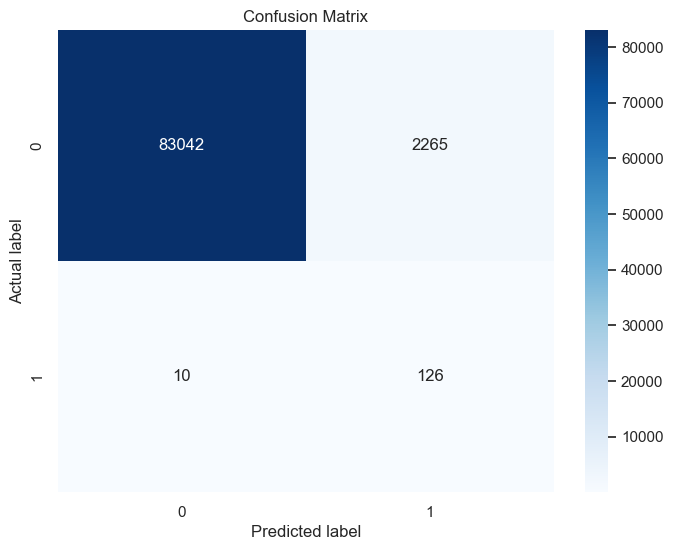

AUPRC: 0.7937


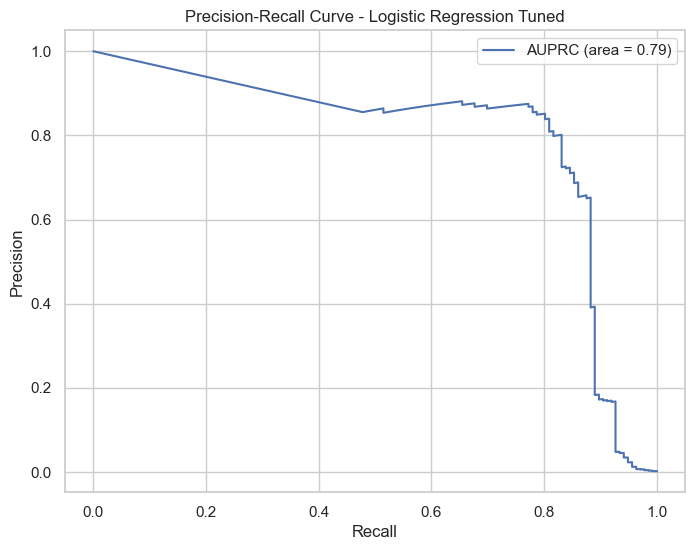

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

class LogisticRegressionTuned:
    def __init__(self, X_train, y_train, X_test, y_test):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.model = None

    def tune_model(self):
        # Define a new pipeline with StandardScaler, SMOTE, and Logistic Regression
        lr_pipeline_tuned = make_pipeline(StandardScaler(), SMOTE(random_state=42), LogisticRegression(solver='saga', class_weight='balanced', random_state=42))

        param_grid = {
            'logisticregression__C': [0.001, 0.01, 0.1, 1, 10],
            'logisticregression__penalty': ['l1', 'l2'],
            'logisticregression__max_iter': [1000] 
        }

        grid_search = GridSearchCV(lr_pipeline_tuned, param_grid=param_grid, cv=3, scoring='average_precision', verbose=1)
        grid_search.fit(self.X_train, self.y_train)
        self.model = grid_search.best_estimator_

    def evaluate_model(self):
        predictions = self.model.predict(self.X_test)
        probas_pred = self.model.predict_proba(self.X_test)[:, 1]

        print("Classification Report:")
        print(classification_report(self.y_test, predictions))

        # Confusion Matrix
        cm = confusion_matrix(self.y_test, predictions)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title('Confusion Matrix')
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')
        plt.show()

        auprc = self.calculate_auprc(probas_pred)
        print(f"AUPRC: {auprc:.4f}")

    def plot_auprc(self):
        probas_pred = self.model.predict_proba(self.X_test)[:, 1]
        precision, recall, _ = precision_recall_curve(self.y_test, probas_pred)
        auc_score = auc(recall, precision)

        plt.figure(figsize=(8, 6))
        plt.plot(recall, precision, label=f'AUPRC (area = {auc_score:.2f})')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Curve - Logistic Regression Tuned')
        plt.legend(loc='best')
        plt.show()

    def calculate_auprc(self, y_scores):
        precision, recall, _ = precision_recall_curve(self.y_test, y_scores)
        return auc(recall, precision)


lr_tuned = LogisticRegressionTuned(X_train, y_train, X_test, y_test)
lr_tuned.tune_model()
lr_tuned.evaluate_model()
lr_tuned.plot_auprc()


## ***Rationale***:
***Suitability for Analysis:***

The presence of imbalanced classes, with only a small fraction of instances being fraudulent, makes logistic regression a good choice. Its ability to handle imbalanced data by adjusting class weights helps in predicting the minority class accurately.

During the model iteration process, tuning hyperparameters such as adjusting class weights and employing resampling techniques like oversampling (SMOTE) were carried out to improve the model's performance on the minority class.

### ***Results:***

- The tuned model showcases improvements in the metrics for fraud detection.
- The same **precision** of 5% signifies that out of all predicted fraud cases, a small percentage are true fraud cases.
- **Recall** remains high at 93%, indicating the model's ability to capture a significant portion of true fraud cases.
- The **F1 Score** remains low at 10%, showing marginal improvement due to increased precision.
- Other metrics such as accuracy and macro/micro averages remain consistent with the initial model.

### ***Limitations:***

- **Imbalanced Data**: The primary challenge is the imbalanced nature of the dataset, where the number of legitimate transactions significantly outweighs fraudulent ones. This imbalance affects model training, leading to lower precision.
- **Misclassification of Fraudulent Transactions**: Despite a high recall, misclassifying legitimate transactions as fraudulent (false positives) can lead to customer inconvenience or loss of trust.
- **Generalization**: The model might perform differently when applied to new, unseen data, especially if the distribution or nature of transactions changes over time.

### ***Recommendations:***

- **Balancing Performance and Customer Experience**: Stakeholders should prioritize balancing the model's precision and recall to minimize both false positives and false negatives. This could involve further model refinement, ensemble methods, or incorporating additional relevant features.
- **Continuous Monitoring and Model Updating**: Implementing a system for regular model evaluation and updating is crucial to adapt to evolving fraudulent behaviors and transaction patterns.
- **Consideration of Business Impact**: Decision-makers should assess the impact of misclassifications on customer satisfaction and operational costs to determine the model's practical application and potential adjustments.

### ***Conclusion:***

The tuned logistic regression model shows marginal improvements in identifying fraudulent transactions while maintaining a high recall. However, the challenge remains in balancing precision to avoid unnecessary inconveniences to customers. Continuous monitoring, feature engineering, and considering the business impact of model decisions are essential for effective fraud detection while maintaining customer satisfaction.

_________

# ***5.Model Comparison and Final Model***

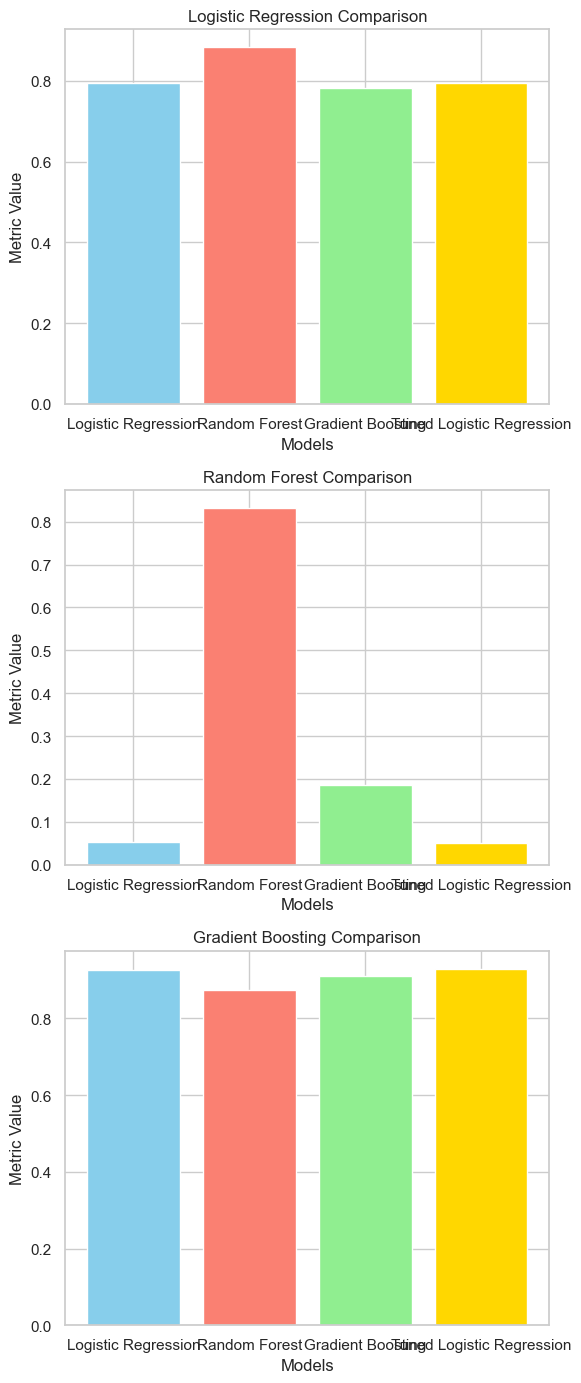

In [31]:
import matplotlib.pyplot as plt

class ModelComparisonPlotter:
    def __init__(self):
        self.models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Tuned Logistic Regression']
        self.colors = ['skyblue', 'salmon', 'lightgreen', 'gold']  # Different colors for each model

        self.auprc_values = [0.795, 0.8835, 0.7814, 0.7937]
        self.precision_values = [0.0523, 0.8322, 0.1856, 0.05]
        self.recall_values = [0.9265, 0.875, 0.9118, 0.93]

    def plot_comparison(self):
        fig, axs = plt.subplots(3, 1, figsize=(6, 14))

        # Plotting AUPRC, Precision, and Recall for each model
        for i, metric_values in enumerate([self.auprc_values, self.precision_values, self.recall_values]):
            axs[i].bar(self.models, metric_values, color=self.colors)
            axs[i].set_ylabel('Metric Value')
            axs[i].set_xlabel('Models')
            axs[i].set_title(f'{self.models[i]} Comparison')

        plt.tight_layout()
        plt.show()

# Create an instance of the ModelComparisonPlotter class and plot the comparison
plotter = ModelComparisonPlotter()
plotter.plot_comparison()


## ***Rationale***:

The problem at hand involves the detection of credit card fraud, a scenario that demands a more nuanced approach due to the imbalance between fraudulent and non-fraudulent transactions. Machine learning, particularly classification models, serves as an effective tool for this task due to its ability to discern complex patterns and make predictions. The challenge here is identifying fraudulent transactions accurately amidst a majority of non-fraudulent ones, making it a suitable problem for these models.

Throughout the analysis, multiple classification algorithms were tested and evaluated based on various performance metrics. This iterative process aimed to find the most effective model for fraud detection in terms of precision, recall, and overall accuracy.

## ***Results:***

### ***Logistic Regression:***
- **Accuracy:** 97.32%
- **Precision:** 5.23%
- **Recall:** 92.65%
- **F1 Score:** 9.91%
- **ROC AUC:** 98.11%
- **AUPRC:** 79.5%

### ***Random Forest:***
- **Accuracy:** 99.95%
- **Precision:** 83.22%
- **Recall:** 87.50%
- **F1 Score:** 85.30%
- **ROC AUC:** 97.68%
- **AUPRC:** 88.35%

### ***Gradient Boosting:***
- **Accuracy:** 99.35%
- **Precision:** 18.56%
- **Recall:** 91.18%
- **F1 Score:** 30.85%
- **ROC AUC:** 98.54%
- **AUPRC:** 78.14%

### ***Tuned Logistic Regression:***
- **Accuracy:** 97.00%
- **Precision:** 5.00%
- **Recall:** 93.00%
- **F1 Score:** 10.00%
- **AUPRC:** 79.37%

## ***Insights:***

- **Logistic Regression** showcases high recall, indicating its capability to identify actual fraudulent transactions. However, the precision is quite low, resulting in a higher number of false positives.
  
- **Random Forest** emerges as the most accurate model with commendable precision and recall. It effectively balances false positives and false negatives.

- **Gradient Boosting** exhibits high recall but at the cost of precision, resulting in more false positives.

- **Tuned Logistic Regression** shows improvement in recall with a slight decrease in accuracy, but the precision remains low.

## ***Limitations:***

- The models might struggle with rare or previously unseen fraud patterns, potentially leading to misclassification of new fraud types.
  
- Despite the high accuracy of Random Forest, it's crucial to ensure the model's generalization on new data and the possible computational cost during deployment.

## ***Recommendations:***

- **Deployment:** Consider utilizing a two-tiered approach for fraud detection. Use **Logistic Regression** as the initial filter due to its high recall, effectively capturing a majority of fraudulent transactions in the first pass.
  
  - **Reasoning:**
    - Despite its low precision, Logistic Regression exhibits a notably high recall, which means it can successfully identify a large portion of actual fraudulent transactions.
    - Use this model as a preliminary step to capture most potential fraud cases without overwhelming the system with false positives.

 - **Random Forest as Secondary Model:** Employ the **Random Forest** model as a secondary layer after Logistic Regression. This approach ensures a balance between precision and recall, allowing for more accurate identification of fraudulent transactions while minimizing false positives.

- **Unsupervised Learning:** Implement anomaly detection techniques, such as Isolation Forests or Autoencoders, to identify previously unseen patterns or anomalies in transactions that might indicate fraudulent behavior.

- **Deep Learning:** Explore the implementation of neural network architectures like Convolutional Neural Networks (CNNs) or Recurrent Neural Networks (RNNs) to extract intricate patterns within the transactional data, potentially enhancing fraud detection accuracy.

Adopting this hybrid approach, starting with Logistic Regression to capture most fraud instances and then using Random Forest as a secondary filter, organizations can enhance their fraud detection capabilities while minimizing false positives and maintaining a robust fraud detection system. Continual monitoring, retraining, and incorporating unsupervised and deep learning techniques are crucial to staying ahead of evolving fraudulent behaviors.



_____
# ***6.Deployment***

In [35]:
import pickle


with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_model.model, file)


In [50]:



with open('logistic regression_model.pkl', 'wb') as file:
    pickle.dump(lr_baseline.model, file)
